In [1]:
#importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import cm
import geopandas as gpd
import plotly.express as px
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING
import plotly.graph_objects as go

from IPython.display import HTML,display
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/covid_vaccine_statewise.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/india-states/Igismap/Indian_States.shp
/kaggle/input/india-states/Igismap/Indian_States.prj
/kaggle/input/india-states/Igismap/Indian_States.dbf
/kaggle/input/india-states/Igismap/Indian_States.shx


In [2]:

#importing main dataset 
df = pd.read_csv('../input/covid19-in-india/covid_19_india.csv', parse_dates=['Date'], dayfirst=True)

#importing tests dataset
tests = pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv' )
#keeping only required columns
df = df[['Date', 'State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns = ['date', 'state','cured','deaths','confirmed']

df.tail()

date          state    cured  deaths  confirmed
18105 2021-08-11      Telangana   638410    3831     650353
18106 2021-08-11        Tripura    77811     773      80660
18107 2021-08-11    Uttarakhand   334650    7368     342462
18108 2021-08-11  Uttar Pradesh  1685492   22775    1708812
18109 2021-08-11    West Bengal  1506532   18252    1534999

This dataset contains information about number of confirmed , deaths and cured in each state daily . This dataset is taken from Ministry of Health & Family Welfare.

# **Current Situation**

In [3]:
#current date
today = df[df.date == '2020-09-24']

gdf = gpd.read_file('../input/india-states/Igismap/Indian_States.shp')
#renaming state names
gdf['st_nm'].replace({"Andaman & Nicobar Island": "Andaman and Nicobar Islands",
                      "Arunanchal Pradesh": "Arunachal Pradesh",
                      'Dadara & Nagar Havelli':'Dadra and Nagar Haveli and Daman and Diu',
                      'Jammu & Kashmir':'Jammu and Kashmir',
                      'NCT of Delhi':'Delhi',
                      'Telangana': 'Telengana'
                     }, inplace=True)
merged = gdf.merge(today ,  left_on='st_nm', right_on='state')
merged.state.replace({"Andaman and Nicobar Islands" : "A & N",
                      'Dadra and Nagar Haveli and Daman and Diu' : 'Daman & Diu',
                      'Jammu and Kashmir' : 'J & K'
                      }, inplace=True)


IndexError: list index out of range

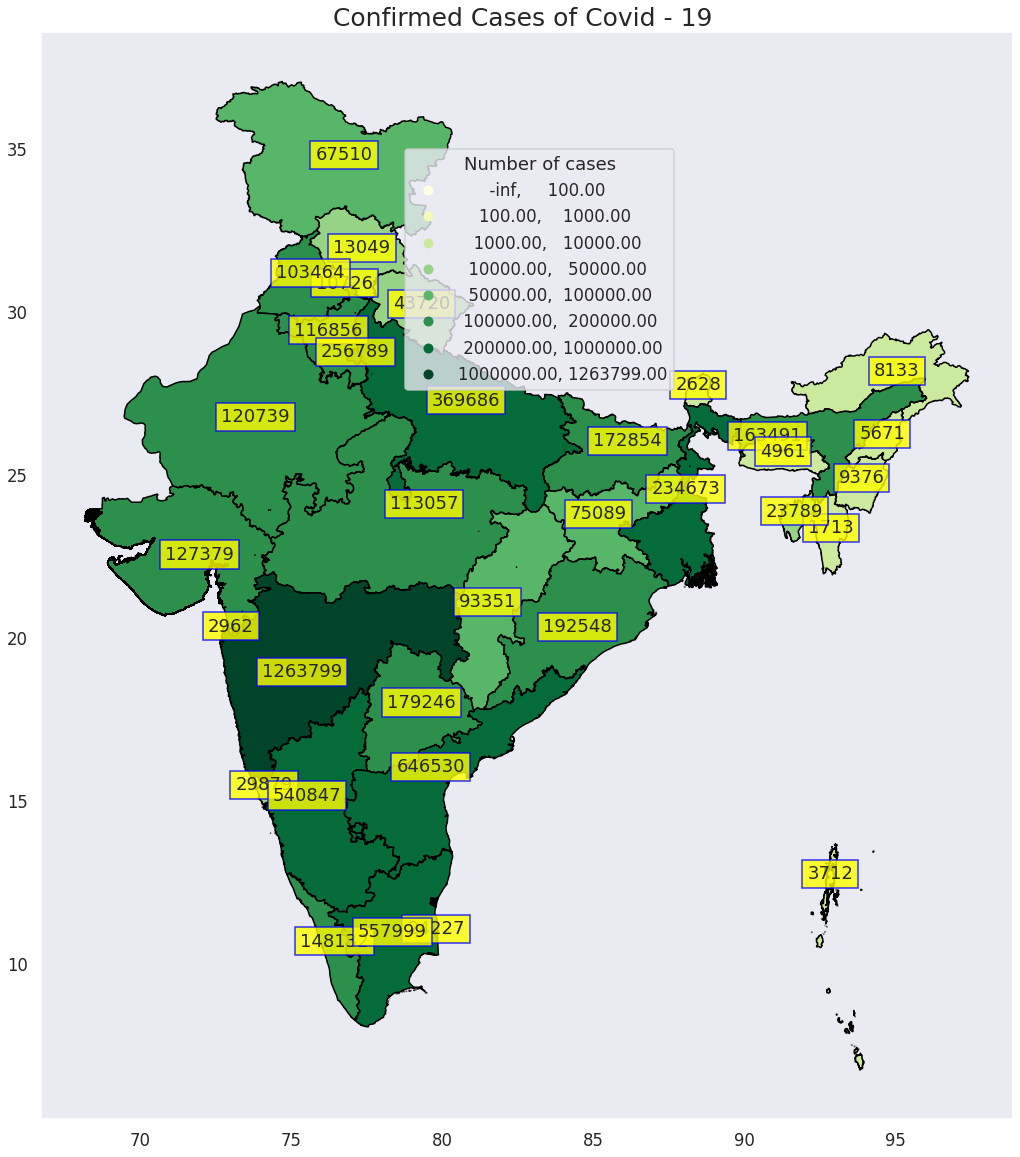

In [4]:
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]


sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'YlGn'
figsize = (25, 20)
ax = merged.plot(column= 'confirmed', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[100,1000,10000,50000,100000,200000,1000000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['confirmed'], 
           horizontalalignment='center', bbox={'facecolor': 'yellow', 
                                               'alpha':0.8, 'pad': 5, 'edgecolor':'blue'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of cases')
ax.set_title("Confirmed Cases of Covid - 19 ", size = 25)
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)


#a = ax.text(65, 35, 'Total Cases \n 529,577',
           # fontsize=25,
           # )


ax.set_axis_off()
plt.axis('equal')
plt.show()

IndexError: list index out of range

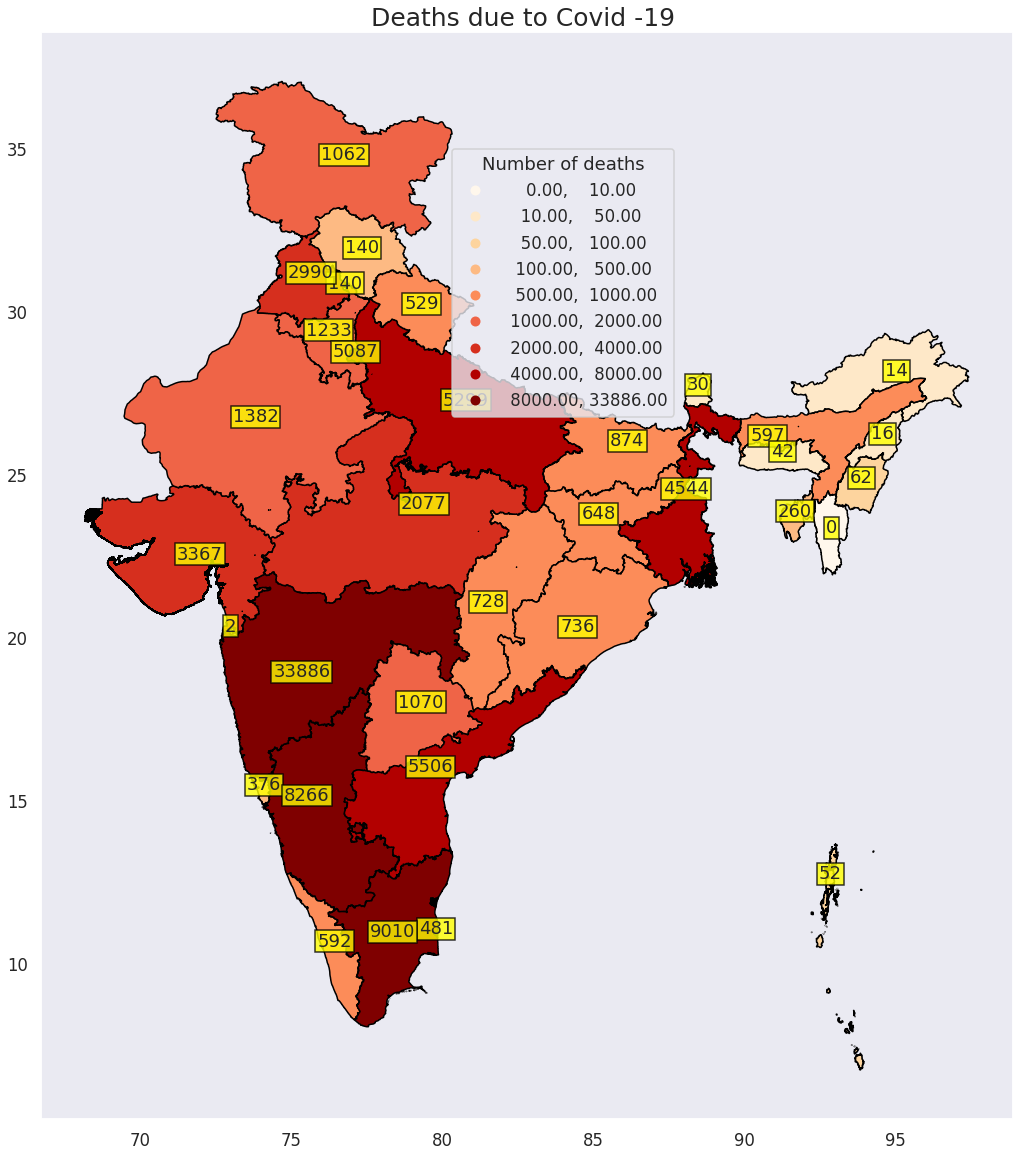

In [5]:

sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'OrRd'
figsize = (25, 20)
ax = merged.dropna().plot(column= 'deaths', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[10,50,100,500,1000,2000,4000,8000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['deaths'], 
           horizontalalignment='center', bbox={'facecolor': 'yellow', 
                                               'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of deaths')
ax.set_title("Deaths due to Covid -19 ", size = 25)
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)
#a = ax.text(65, 35, 'Total Deaths \n 16,103',
            #fontsize=25,
            #)
ax.set_axis_off()
plt.axis('equal')
plt.show()

IndexError: list index out of range

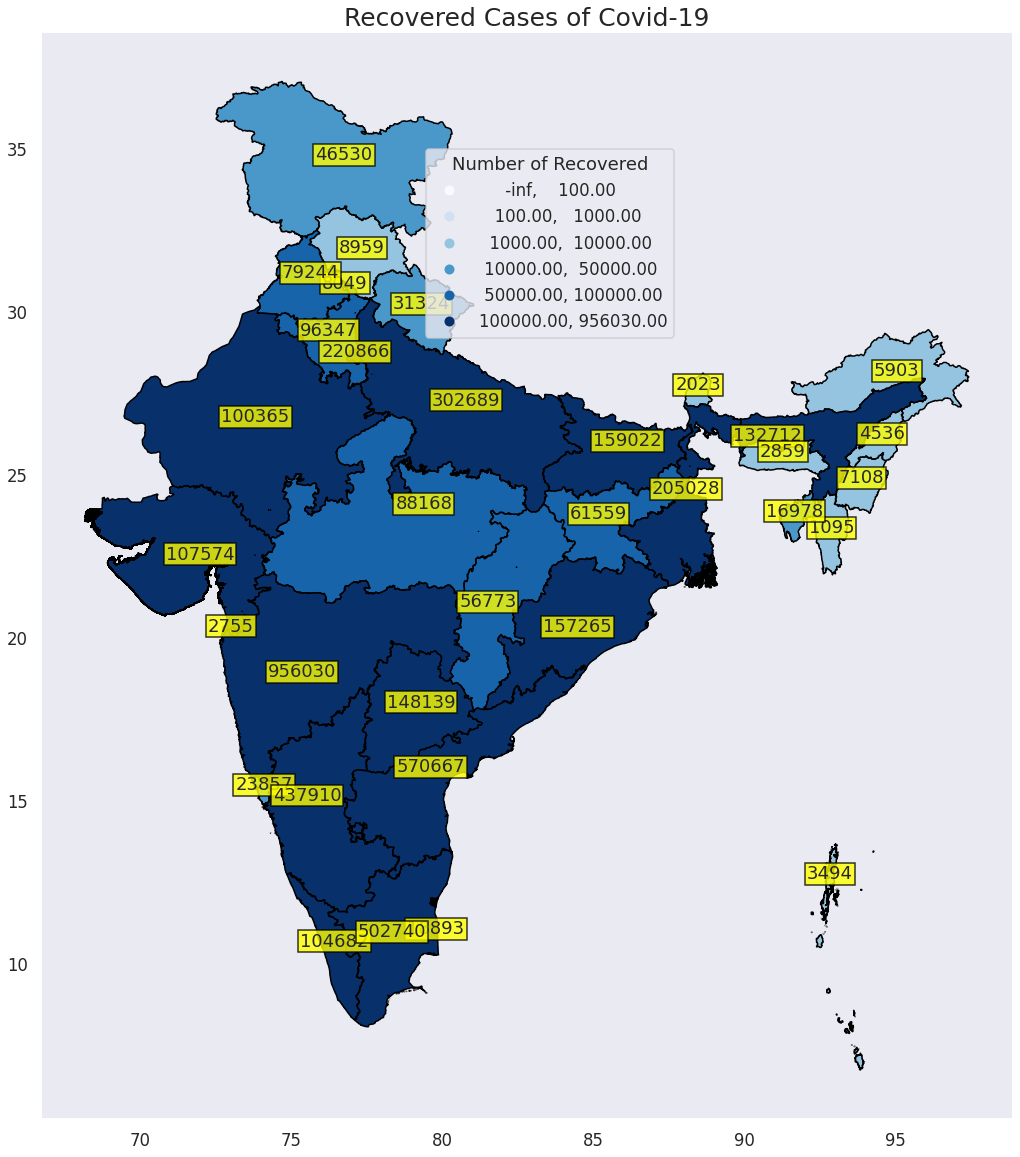

In [6]:
sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'Blues'
figsize = (25, 20)
ax = merged.dropna().plot(column= 'cured', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[100,1000,10000,50000,100000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['cured'], 
           horizontalalignment='center', bbox={'facecolor': 'yellow', 
                                               'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of Recovered')
ax.set_title("Recovered Cases of Covid-19", size = 25)
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)

#a = ax.text(65, 35, 'Total Recovered \n 310,146',
           # fontsize=25,
            #)
ax.set_axis_off()
plt.axis('equal')
plt.show()

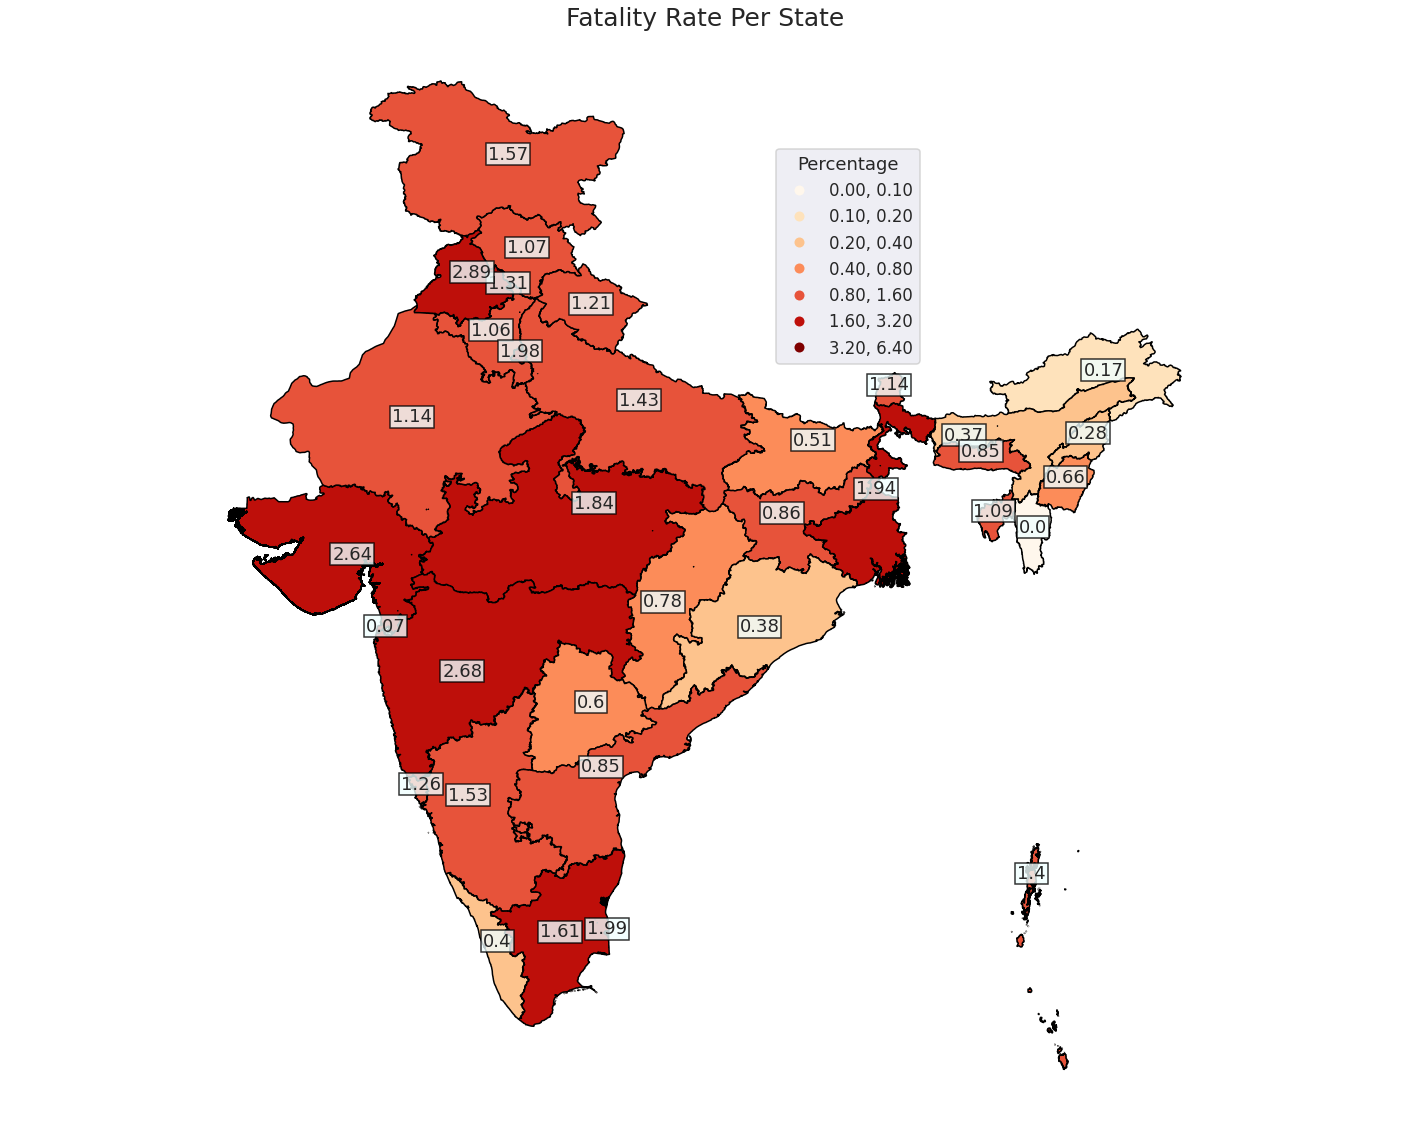

In [7]:
merged['dcratio'] = merged['deaths'] / merged['confirmed'] * 100
merged.dcratio = merged.dcratio.round(2)



sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'OrRd'
figsize = (25, 20)
ax = merged.dropna().plot(column= 'dcratio', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[0.1 , 0.2 , 0.4 , 0.8 , 1.6 , 3.2 , 6.4]),
                          
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['dcratio'], 
           horizontalalignment='center', bbox={'facecolor': 'azure', 
                                               'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Percentage')
ax.set_title("Fatality Rate Per State", size = 25)

#a = ax.text(61, 35, 'Total Death/Confirmed \n percentage \n 3.05',
           # fontsize=25,
           # )
ax.set_axis_off()
plt.axis('equal')
plt.show()

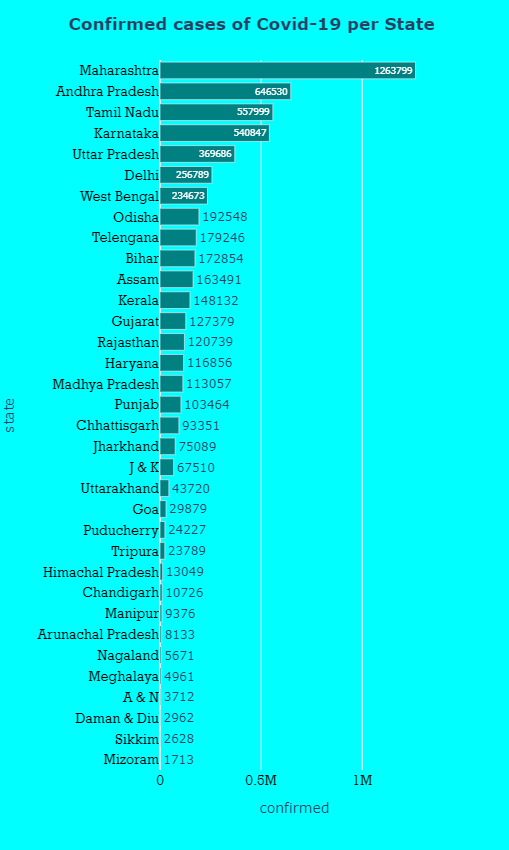

In [8]:
confirmed = merged.sort_values('confirmed', ascending = True)

lowc = confirmed.head(10)
highc = confirmed.tail(10)


fig = px.bar(confirmed, x="confirmed", y="state", orientation='h', text = 'confirmed')
fig.update_layout(
    title_text='<b>Confirmed cases of Covid-19 per State <b>',
    title_x=0.5,
    paper_bgcolor='aqua',
    plot_bgcolor = "aqua",
    autosize=False,
    width= 850,
    height=850)
fig.update_traces(marker_color='teal')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

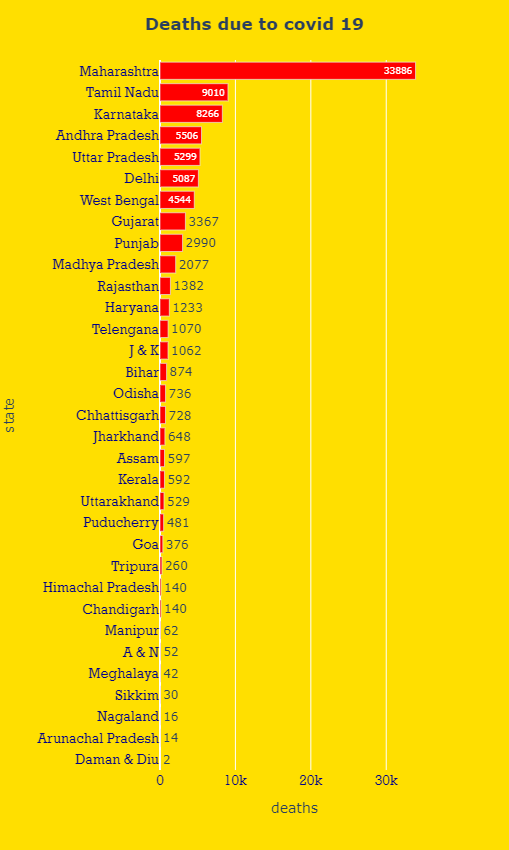

In [9]:
deaths = merged.sort_values('deaths', ascending = True)
deaths = deaths[deaths.deaths > 0 ]
lowd = deaths.head(10)
highd = deaths.tail(10)
fig = px.bar(deaths, x="deaths", y="state", orientation='h', text = 'deaths')
fig.update_layout(
    title_text='<b>Deaths due to covid 19<b>',
    title_x=0.5,
    paper_bgcolor='rgb(255,223,0)',
    plot_bgcolor = "rgb(255,223,0)",
    autosize=False,
    width=850,
    height= 850)
fig.update_traces(marker_color='red')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='darkblue', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='darkblue', size=14))
fig.show()

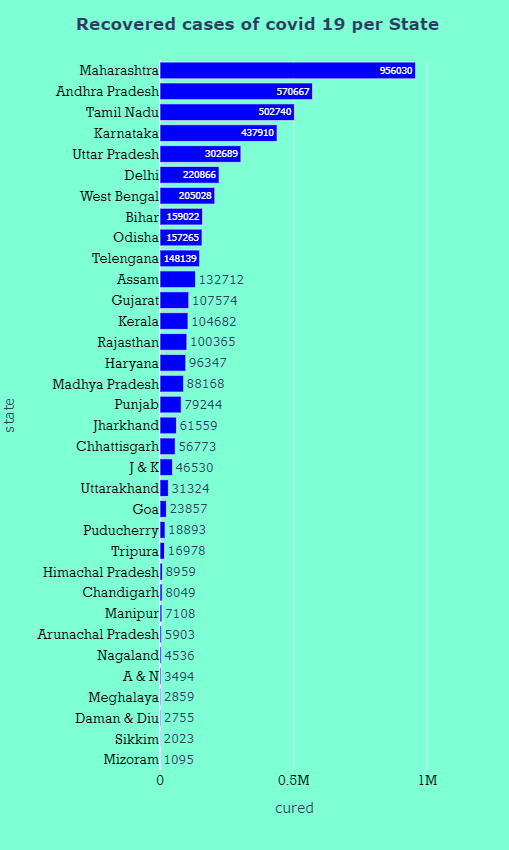

In [10]:
recovered = merged.sort_values('cured', ascending = True)
highr = recovered.head(10)
lowr = recovered.tail(10)

fig = px.bar(recovered, x="cured", y="state", orientation='h', text = 'cured')
fig.update_layout(
    title_text='<b> Recovered cases of covid 19 per State<b>',
    title_x=0.5,
    paper_bgcolor='aquamarine',
    plot_bgcolor = "aquamarine",
    autosize=False,
    width= 850,
    height= 850)
fig.update_traces(marker_color='blue')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

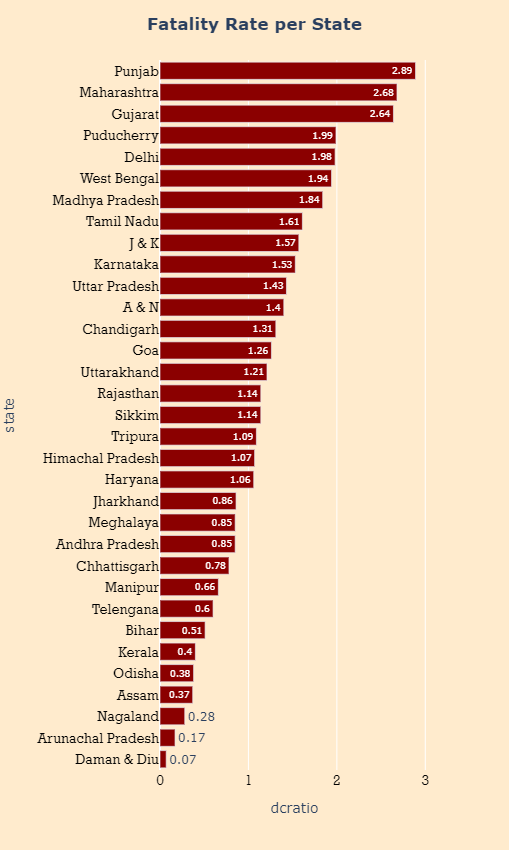

In [11]:
merged = merged[merged.dcratio > 0.0]
merged = merged.sort_values('dcratio', ascending = True)
fig = px.bar(merged, x="dcratio", y="state", orientation='h', text = 'dcratio')
fig.update_layout(
    title_text='<b>Fatality Rate per State<b>',
    title_x=0.5,
    paper_bgcolor='blanchedalmond',
    plot_bgcolor = "blanchedalmond",
    autosize=False,
    width= 850,
    height= 850)
fig.update_traces(marker_color='darkred')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

# **Covid-19 Trend Analysis**

In [13]:
#Number of Cases daily
df2 = df.groupby(['date'])['confirmed', 'deaths','cured',].sum().reset_index()
#making columns for daily new cases
df2['new_confirmed'] = df2.confirmed.diff()
df2['new_deaths'] = df2.deaths.diff()
df2['new_cured'] = df2.cured.diff()


#taking dates from 15th March
df2 = df2.iloc[44:]

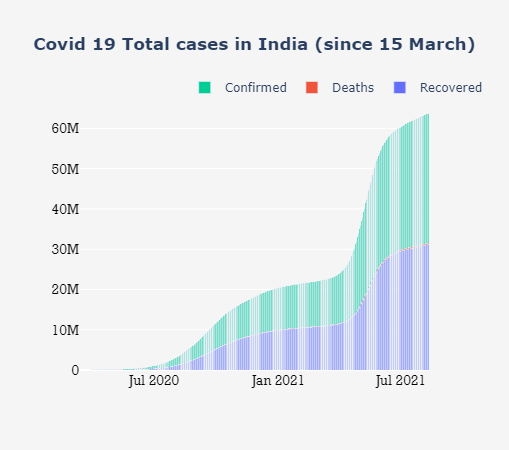

In [14]:
fig = go.Figure(go.Bar(x= df2.date, y= df2.cured, name='Recovered'))
fig.add_trace(go.Bar(x=df2.date, y= df2.deaths, name='Deaths'))
fig.add_trace(go.Bar(x=df2.date, y= df2.confirmed, name='Confirmed'))

fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Covid 19 Total cases in India (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",)
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

<h3>Daily New Cases of Covid 19 <h3>

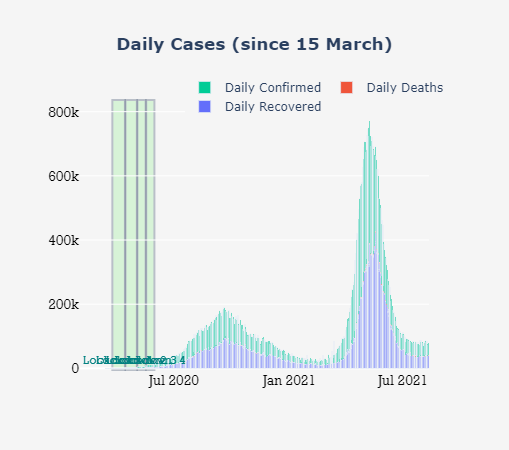

In [15]:
fig = go.Figure(go.Bar(x= df2.date, y= df2.new_cured, name='Daily Recovered'))
fig.add_trace(go.Bar(x=df2.date, y= df2.new_deaths, name='Daily Deaths'))
fig.add_trace(go.Bar(x=df2.date, y= df2.new_confirmed, name='Daily Confirmed'))
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.add_annotation(
            x= "2020-04-03",
            y=23000,
           text="<b>Lockdown 1<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-04-23",
            y=23000,
            text="<b>Lockdown 2<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x="2020-05-10",
            y=23000,
           text="<b>Lockdown 3<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-05-24",
            y=23000,
            text="<b>Lockdown 4<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)

fig.update_layout(barmode='stack', 
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Daily Cases (since 15 March)<b>',
                  title_x=0.5,legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",
                  shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)
fig.show()

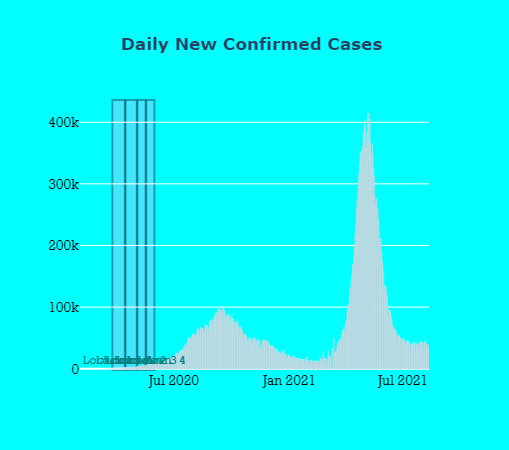

In [16]:
import plotly.graph_objects as go


fig = go.Figure([go.Bar(x= df2.date, y= df2.new_confirmed,marker_color='teal')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))

fig.add_annotation(
            x= "2020-04-03",
            y=12500,
           text="<b>Lockdown 1<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-04-23",
            y=12500,
            text="<b>Lockdown 2<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x="2020-05-10",
            y=12500,
           text="<b>Lockdown 3<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-05-24",
            y=12500,
            text="<b>Lockdown 4<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)

fig.update_layout(
    title_text='<b>Daily New Confirmed Cases <b>',
                  title_x=0.5,
                 paper_bgcolor='aqua',
                 plot_bgcolor = "aqua",
    shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)

fig.show()


Here the shaded rectangles represent the lockdown period . 

* 1st Lockdown : 25 March - 14 April (21 Days)

* 2nd Lockdown : 15 April - 3 May (19 Days)

* 3rd Lockdown : 4 May - 17 May (14 Days)

* 4th Lockdown : 18 May - 31 may (14 Days)

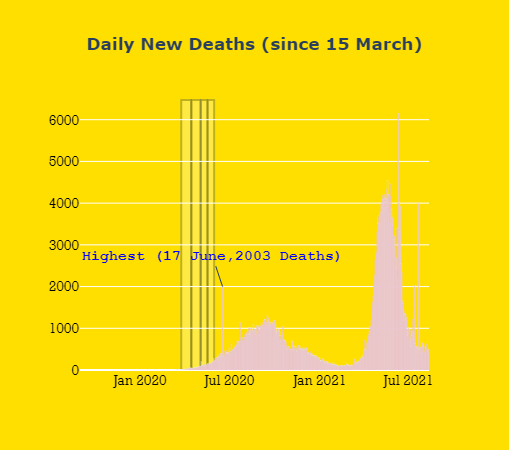

In [17]:
import plotly.graph_objects as go


fig = go.Figure([go.Bar(x= df2.date, y= df2.new_deaths,marker_color='red')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))


fig.add_annotation(
            x= "2020-06-17",
            y= 2003,
            text="<b>Highest (17 June,2003 Deaths)<b>",showarrow= True,font=dict(
            family="Courier New, monospace",
            size=15,
            color="blue"
            ),
        align="center",)

fig.update_layout(
    title_text='<b>Daily New Deaths (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='rgb(255,223,0)',
                 plot_bgcolor = "rgb(255,223,0)",
    shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="lightyellow",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="lightyellow",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="lightyellow",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="lightyellow",
            opacity=0.3,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)

fig.show()

Inference: The number of daily deaths is increasing significantly over the months. Currently the number of deaths are increasing with 350+ daily . One thing to notice about above graph is on 17 th June , India has reported 2003 Deaths. I wonder whats the reason behind the number of deaths to be high on that particular day.

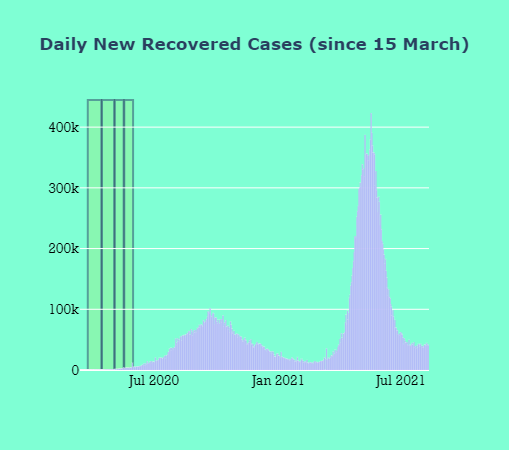

In [18]:
fig = go.Figure([go.Bar(x= df2.date, y= df2.new_cured,marker_color='blue')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))

fig.update_layout(
    title_text='<b>Daily New Recovered Cases (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='aquamarine',
                 plot_bgcolor = "aquamarine",
    shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.5,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)

fig.show()

# **Statewise Analysis**

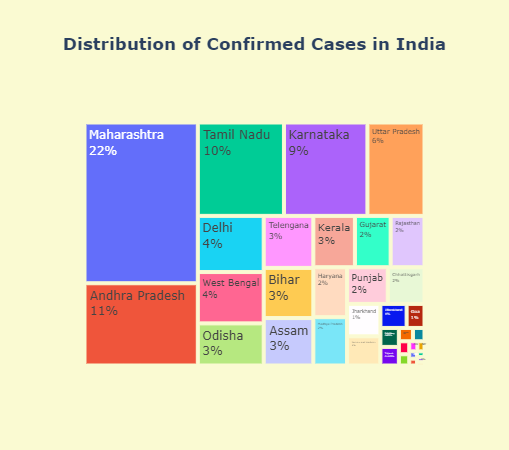

In [19]:

state = list(today.state)
cases = list(today.confirmed)

fig= go.Figure(go.Treemap(
    
    labels =  state,
    parents=[""]*len(state),
    values =  cases,
    textinfo = "label+percent entry"
))
fig.update_layout(
    title_text= '<b>Distribution of Confirmed Cases in India<b>',
    title_x=0.5,
    paper_bgcolor='lightgoldenrodyellow',
    plot_bgcolor = "lightgoldenrodyellow",
    
    )

fig.show()

In [20]:
#Statewise new confirmed
df['new_confirmed'] = df.groupby(['state'])['confirmed'].diff()
df['new_deaths'] = df.groupby(['state'])['deaths'].diff()
df['new_cured'] = df.groupby(['state'])['cured'].diff()

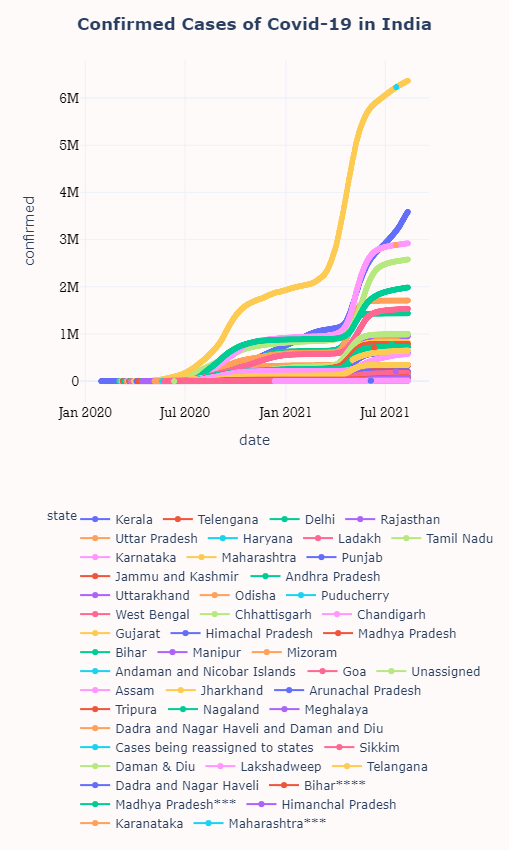

In [21]:
import plotly.express as px


fig = px.line(df, x="date", y="confirmed", color='state',template= "plotly_white")
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_traces(mode='lines + markers')
fig.update_layout(legend_orientation="h",legend=dict(x= -.1, y=-.3),
                  autosize=False,
                  width= 750,
                  height= 850,
                  title_text='<b>Confirmed Cases of Covid-19 in India<b> ',
                  title_x=0.5,
                 paper_bgcolor='snow',
                 plot_bgcolor = "snow")
fig.show()

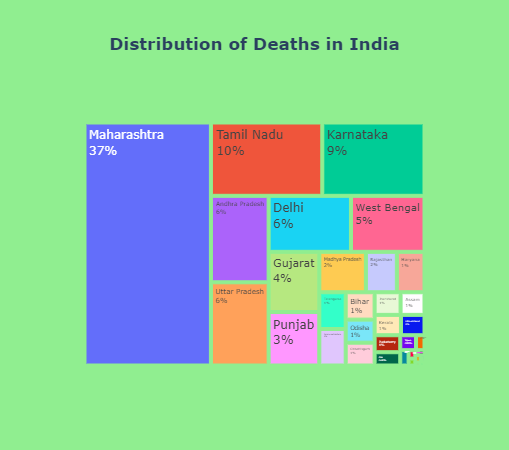

In [22]:

state = list(today.state)
cases = list(today.deaths)

fig= go.Figure(go.Treemap(
    
    labels =  state,
    parents=[""]*len(state),
    values =  cases,
    textinfo = "label+percent entry"
))
fig.update_layout(
    title_text= '<b>Distribution of Deaths in India<b>',
    title_x=0.5,
    paper_bgcolor='lightgreen',
    plot_bgcolor = "lightgreen",
    
    )

fig.show()

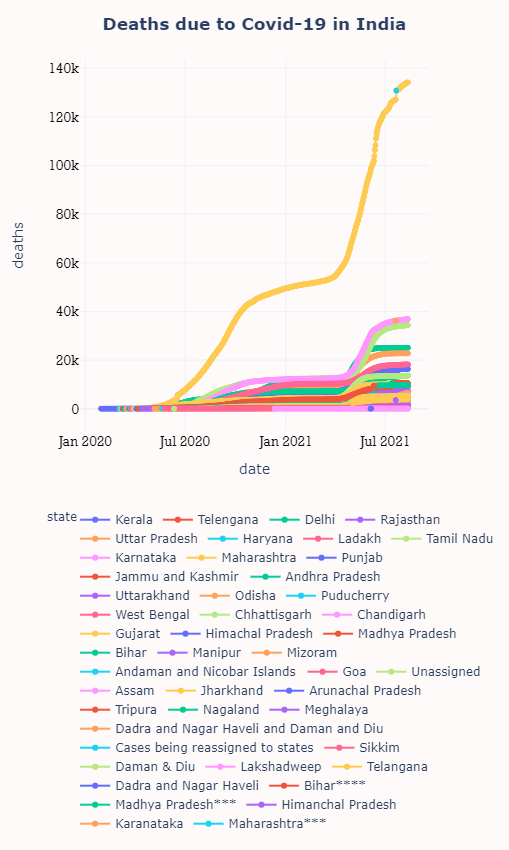

In [23]:
import plotly.express as px


fig = px.line(df, x="date", y="deaths", color='state',template= "plotly_white")
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_traces(mode='lines + markers')
fig.update_layout(legend_orientation="h",legend=dict(x= -.1, y=-.2),
                  autosize=False,
                  width= 750,
                  height= 850,
                  title_text='<b>Deaths due to Covid-19 in India<b>',
                  title_x=0.5,
                 paper_bgcolor='snow',
                 plot_bgcolor = "snow")
fig.show()

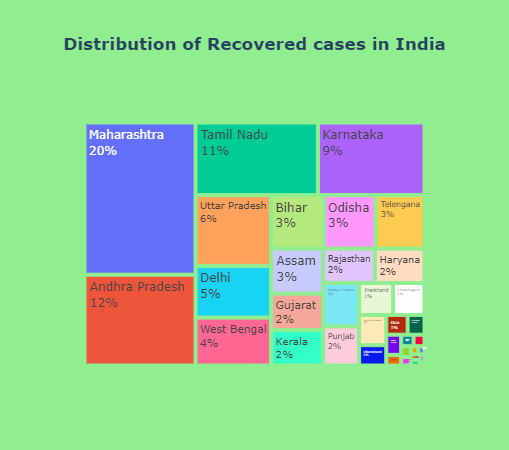

In [24]:

state = list(today.state)
cases = list(today.cured)

fig= go.Figure(go.Treemap(
    
    labels =  state,
    parents=[""]*len(state),
    values =  cases,
    textinfo = "label+percent entry"
))
fig.update_layout(
    title_text= '<b>Distribution of Recovered cases in India<b>',
    title_x=0.5,
    paper_bgcolor='lightgreen',
    plot_bgcolor = "lightgreen",
    
    )

fig.show()

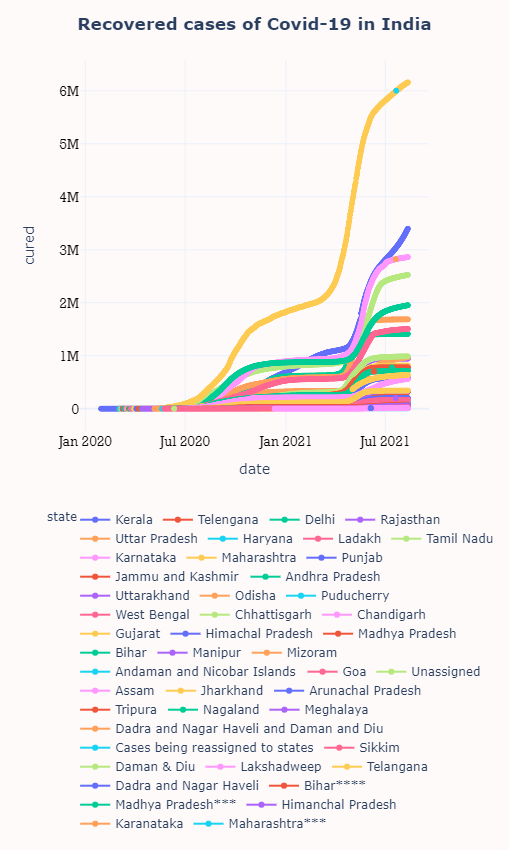

In [25]:
import plotly.express as px


fig = px.line(df, x="date", y="cured", color='state',template= "plotly_white")
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_traces(mode='lines + markers')
fig.update_layout(legend_orientation="h",legend=dict(x= -.1, y=-.2),
                  autosize=False,
                  width= 750,
                  height= 850,
                  title_text='<b>Recovered cases of Covid-19 in India<b>',
                  title_x=0.5,
                 paper_bgcolor='snow',
                 plot_bgcolor = "snow")
fig.show()

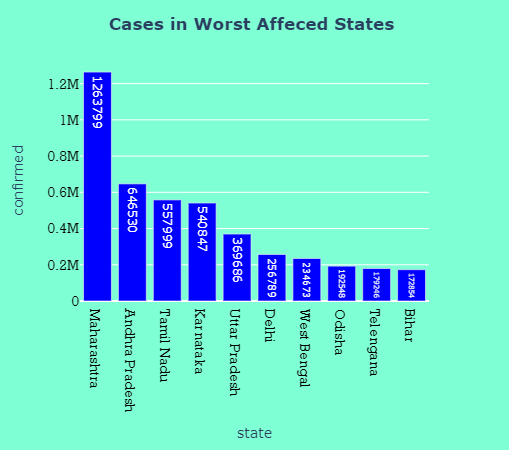

In [26]:
highc = highc.sort_values('confirmed', ascending = False)
fig = px.bar(highc, x="state", y="confirmed", text = 'confirmed')
fig.update_layout(
    title_text='<b>Cases in Worst Affeced States <b>',
    title_x=0.5,
    paper_bgcolor='aquamarine',
    plot_bgcolor = "aquamarine",
    )
fig.update_traces(marker_color='blue')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [27]:
states = ['Maharashtra', 'Delhi', 'Tamil Nadu', 'Gujarat', 'Uttar Pradesh',
       'Rajasthan', 'West Bengal', 'Madhya Pradesh', 'Haryana',
       'Andhra Pradesh']



higha = df[df.state.isin(states)]

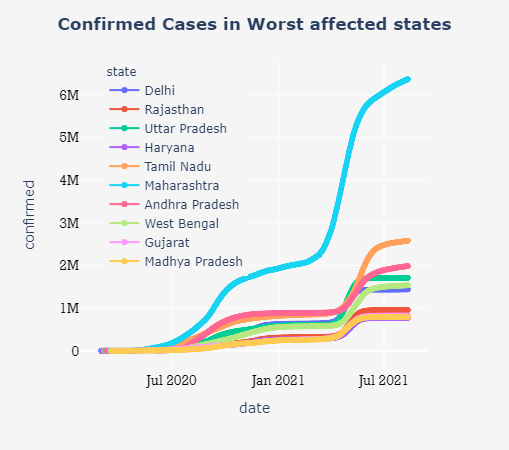

In [28]:
import plotly.express as px


fig = px.line(higha, x="date", y="confirmed", color='state')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_traces(mode='lines + markers')
fig.update_layout(legend=dict(x= 0.07, y= 1),
    title_text='<b>Confirmed Cases in Worst affected states<b>',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke")
fig.show()

<h2>Deaths in Worst affected states<h2>

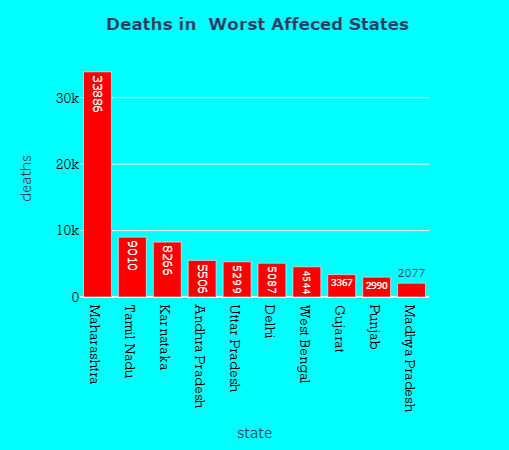

In [29]:
highd = highd.sort_values('deaths', ascending = False)
fig = px.bar(highd, x="state", y="deaths", text = 'deaths')
fig.update_layout(
    title_text='<b> Deaths in  Worst Affeced States<b>',
    title_x=0.5,
    paper_bgcolor='aqua',
    plot_bgcolor = "aqua",
    )
fig.update_traces(marker_color='red')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

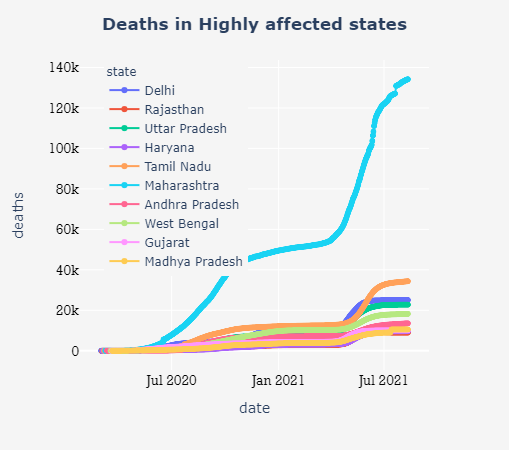

In [30]:
fig = px.line(higha, x="date", y="deaths", color='state')
fig.update_traces(mode='lines+markers')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(legend=dict(x= 0.07, y= 1),
    title_text='<b>Deaths in Highly affected states<b> ',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke")
fig.show()